# Project 3
**Jay Kynerd —** 
Fashion MINST

# Import the Data

In [82]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

categories = {
    0: 'T-shirt/top',
    1:	'Trouser',
    2:	'Pullover',
    3:	'Dress',
    4:	'Coat',
    5:	'Sandal',
    6:	'Shirt',
    7:	'Sneaker',
    8:	'Bag',
    9:	'Ankle boot'
}


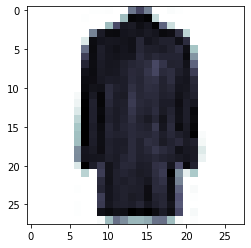

In [64]:
%matplotlib inline

plt.imshow(X_train[5462].reshape(28,28), cmap='bone_r')
plt.show()


***Sample image***

# Ordinal Encoder

In [70]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

y_encoded = ordinal_encoder.fit_transform(y_train.reshape(-1,1))
y_encoded

array([[9.],
       [0.],
       [0.],
       ...,
       [3.],
       [0.],
       [5.]])

# One Hot Encoder

In [71]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

y_1hot = cat_encoder.fit_transform(y_train.reshape(-1,1))
y_1hot

<60000x10 sparse matrix of type '<class 'numpy.float64'>'
	with 60000 stored elements in Compressed Sparse Row format>

# SGD Classifier

In [83]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train[:100], y_train[:100])

prediction = sgd_clf.predict(X_test[65].reshape(1, -1))[0]
categories[prediction]

'Trouser'

*testing...*

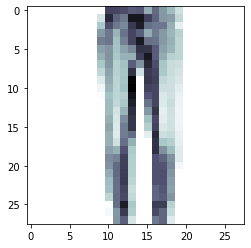

In [84]:
plt.imshow(X_test[65].reshape(28, 28), cmap='bone_r')
plt.show()

# Random Forest Regressor

In [91]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train[:1000], y_train[:1000])

prediction = forest_reg.predict(X_test[253].reshape(1, -1))[0]
categories[int(prediction)]

'Sandal'

*testing...*

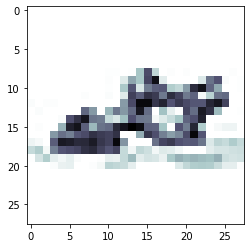

In [92]:
plt.imshow(X_test[253].reshape(28, 28), cmap='bone_r')
plt.show()

# K-neighbors Classifer

In [95]:
from sklearn.neighbors import KNeighborsClassifier


knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

prediction = knn_clf.predict(X_test[692].reshape(1, -1))[0]
categories[int(prediction)]

'Ankle boot'

*testing...*

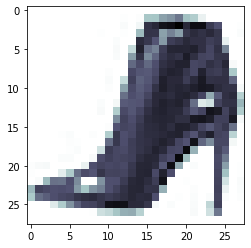

In [97]:
plt.imshow(X_test[692].reshape(28, 28), cmap='bone_r')
plt.show()